In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
weather = pd.read_csv('tp_bike/weather.csv')

In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 24 columns):
date                              3665 non-null object
max_temperature_f                 3661 non-null float64
mean_temperature_f                3661 non-null float64
min_temperature_f                 3661 non-null float64
max_dew_point_f                   3611 non-null float64
mean_dew_point_f                  3611 non-null float64
min_dew_point_f                   3611 non-null float64
max_humidity                      3611 non-null float64
mean_humidity                     3611 non-null float64
min_humidity                      3611 non-null float64
max_sea_level_pressure_inches     3664 non-null float64
mean_sea_level_pressure_inches    3664 non-null float64
min_sea_level_pressure_inches     3664 non-null float64
max_visibility_miles              3652 non-null float64
mean_visibility_miles             3652 non-null float64
min_visibility_miles              3652 non-null float6

In [4]:
weather['events'].value_counts()

Rain                 388
Fog                  112
Fog-Rain              17
Rain-Thunderstorm      3
rain                   2
Name: events, dtype: int64

In [5]:
weather.groupby('events').count()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,zip_code
events,,,,,,,,,,,,,,,,,,,,,
Fog,112,112,112,112,105,105,105,105,105,105,...,112,112,112,112,112,82,112,112,112,112
Fog-Rain,17,17,17,17,16,16,16,16,16,16,...,17,17,17,17,17,16,17,17,17,17
Rain,388,388,388,388,375,375,375,375,375,375,...,388,388,388,388,388,333,388,388,388,388
Rain-Thunderstorm,3,3,3,3,2,2,2,2,2,2,...,3,3,3,3,3,2,3,3,3,3
rain,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [6]:
#agrego el nombre de las ciudades
weather['city'] = weather.zip_code.map({95113:'San Jose', 94301:'Palo Alto',\
                  94107:'San Francisco', 94063:'Redwood City', 94041:'Mountain View'})

In [7]:
#Rain y rain son lo mismo, lo soluciono
weather['events'] = weather['events'].str.lower()

In [8]:
weather.groupby('events').count()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,zip_code,city
events,,,,,,,,,,,,,,,,,,,,,
fog,112,112,112,112,105,105,105,105,105,105,...,112,112,112,112,82,112,112,112,112,112
fog-rain,17,17,17,17,16,16,16,16,16,16,...,17,17,17,17,16,17,17,17,17,17
rain,390,390,390,390,377,377,377,377,377,377,...,390,390,390,390,335,390,390,390,390,390
rain-thunderstorm,3,3,3,3,2,2,2,2,2,2,...,3,3,3,3,2,3,3,3,3,3


In [9]:
weather_events = weather.dropna(subset = ['events'])

In [10]:
len(weather_events)

522

In [11]:
weather_events.head(3)

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code,city
14,9/12/2013,71.0,65.0,59.0,58.0,57.0,55.0,84.0,73.0,61.0,...,9.0,25.0,11.0,30.0,0,7.0,fog,268.0,94107,San Francisco
23,9/21/2013,68.0,63.0,58.0,59.0,56.0,53.0,90.0,75.0,59.0,...,2.0,24.0,12.0,28.0,0.23,6.0,rain,218.0,94107,San Francisco
32,9/30/2013,73.0,66.0,59.0,60.0,57.0,43.0,87.0,69.0,51.0,...,10.0,22.0,10.0,26.0,T,4.0,fog,264.0,94107,San Francisco


In [12]:
weather_events.loc[weather_events.events.str.contains('rain-thunderstorm'),:]

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code,city
2020,2/28/2015,59.0,52.0,44.0,46.0,44.0,41.0,92.0,74.0,55.0,...,4.0,22.0,7.0,25.0,0.07,4.0,rain-thunderstorm,257.0,94107,San Francisco
2179,8/6/2015,72.0,65.0,58.0,58.0,57.0,54.0,93.0,77.0,61.0,...,7.0,21.0,8.0,24.0,T,5.0,rain-thunderstorm,309.0,94107,San Francisco
2660,11/30/2014,62.0,58.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,17.0,8.0,NaN,0,7.0,rain-thunderstorm,154.0,94301,Palo Alto


In [13]:
weather.loc[weather.date.str.contains('2/28/2015')]
#para una misma fecha, ocurrieron distintos eventos, tiene sentido pues
#son 5 ciudades distintas, ej: el dia de hoy hubo lluvia en BS AS, pero en
#jujuy pudo haber niebla

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code,city
2020,2/28/2015,59.0,52.0,44.0,46.0,44.0,41.0,92.0,74.0,55.0,...,4.0,22.0,7.0,25.0,0.07,4.0,rain-thunderstorm,257.0,94107,San Francisco
2385,2/28/2015,60.0,54.0,48.0,48.0,45.0,41.0,94.0,77.0,52.0,...,10.0,16.0,6.0,22.0,0,4.0,NaN,269.0,94063,Redwood City
2750,2/28/2015,59.0,52.0,48.0,46.0,46.0,45.0,87.0,70.0,63.0,...,10.0,7.0,6.0,NaN,0,5.0,NaN,281.0,94301,Palo Alto
3115,2/28/2015,61.0,53.0,45.0,46.0,44.0,39.0,86.0,70.0,53.0,...,7.0,16.0,3.0,22.0,0.05,3.0,rain,264.0,94041,Mountain View
3480,2/28/2015,60.0,52.0,44.0,45.0,43.0,37.0,86.0,69.0,51.0,...,9.0,18.0,4.0,21.0,0.04,5.0,rain,143.0,95113,San Jose


In [14]:
#pregunta interesante: en que ciudad suele llover bastante?

In [15]:
group_rain = weather_events.groupby('events').get_group('rain')

In [16]:
#cantidad de dias lluviosos en cada ciudad
group_rain.groupby('city').count()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
city,,,,,,,,,,,,,,,,,,,,,
Mountain View,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
Palo Alto,60,60,60,60,47,47,47,47,47,47,...,60,60,60,60,32,60,60,60,60,60
Redwood City,75,75,75,75,75,75,75,75,75,75,...,75,75,75,75,51,75,75,75,75,75
San Francisco,93,93,93,93,93,93,93,93,93,93,...,93,93,93,93,92,93,93,93,93,93
San Jose,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,78,80,80,80,80,80


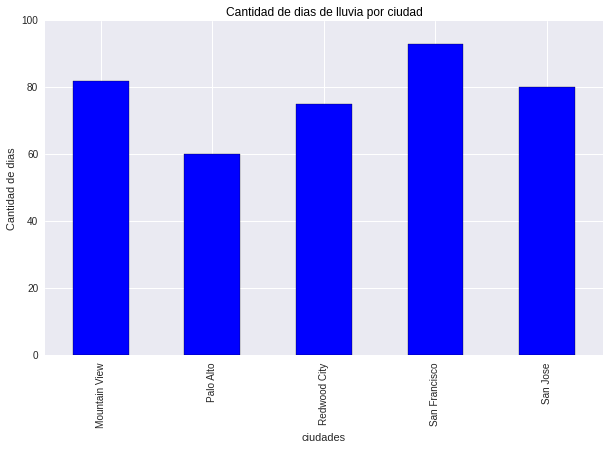

In [17]:
plt.figure()
plt.title('Cantidad de dias de lluvia por ciudad', color = 'black')
group_rain.groupby('city').count()['events'].plot(kind = 'bar', figsize=(10,6),\
                                                  color = 'blue');
plt.ylabel('Cantidad de dias')
plt.xlabel('ciudades')

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


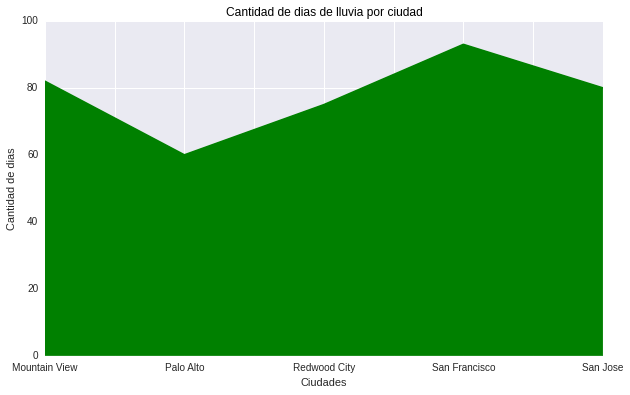

In [18]:
plt.figure()
plt.title('Cantidad de dias de lluvia por ciudad', color = 'black')
group_rain.groupby('city').count()['events'].plot(kind = 'area', figsize = (10,6), color = 'green');
plt.ylabel('Cantidad de dias')
plt.xlabel('Ciudades')

# Analisis de temperaturas en distintas ciudades

In [20]:
weather['max_temperature_f'] = weather['max_temperature_f'].map(lambda x: round((x-32)/1.8,1))
weather['min_temperature_f'] = weather['min_temperature_f'].map(lambda x: round((x-32)/1.8,1))
weather['mean_temperature_f'] = weather['mean_temperature_f'].map(lambda x: round((x-32)/1.8,1))

In [21]:
weather.rename(columns={'max_temperature_f' : 'max_temperature',\
                        'min_temperature_f' : 'min_temperature','mean_temperature_f' : 'mean_temperature'},inplace=True)

In [25]:
weather.head(3)

,date,max_temperature,mean_temperature,min_temperature,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code,city
0,8/29/2013,23.3,20.0,16.1,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,San Francisco
1,8/30/2013,25.6,20.6,15.6,61.0,58.0,56.0,90.0,70.0,50.0,...,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107,San Francisco
2,8/31/2013,21.7,17.8,13.9,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107,San Francisco


In [54]:
weather_sf = weather.loc[weather.city.str.contains('San Francisco'),:]

(0, 25)

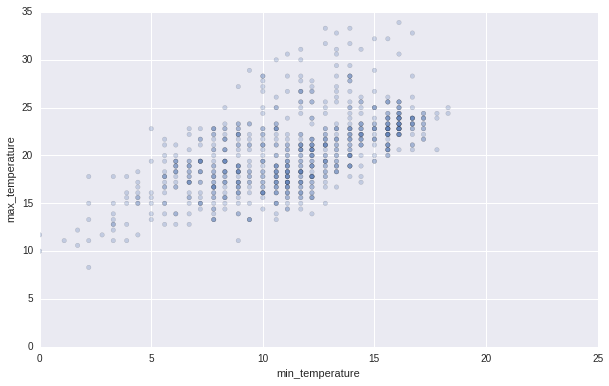

In [56]:
#plt.title('Temperaturas en San Francisco', color = 'black')
weather_sf.plot.scatter('min_temperature','max_temperature',alpha=0.25,figsize=(10,6));
plt.ylim([0,35])
plt.xlim([0,25])

In [49]:
#parece que en sf hay la temp_max, varia entre 15 y 25
weather_sf.loc[weather_sf.max_temperature >= 15,:]\
          .loc[weather_sf.max_temperature<=20,:].count()
#entre 15 y 20, 331 registros    

date                              331
max_temperature                   331
mean_temperature                  331
min_temperature                   331
max_dew_point_f                   331
mean_dew_point_f                  331
min_dew_point_f                   331
max_humidity                      331
mean_humidity                     331
min_humidity                      331
max_sea_level_pressure_inches     331
mean_sea_level_pressure_inches    331
min_sea_level_pressure_inches     331
max_visibility_miles              331
mean_visibility_miles             331
min_visibility_miles              331
max_wind_Speed_mph                331
mean_wind_speed_mph               331
max_gust_speed_mph                326
precipitation_inches              331
cloud_cover                       331
events                            100
wind_dir_degrees                  331
zip_code                          331
city                              331
dtype: int64

(0, 40)

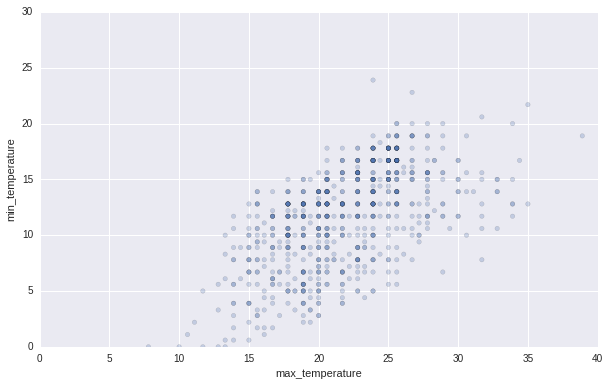

In [61]:
#temperatura en palo alto
weather_pa = weather.loc[weather.city.str.contains('Palo Alto'),:]
weather_pa.plot.scatter('max_temperature','min_temperature',alpha=0.25,figsize=(10,6));
plt.ylim([0,30])
plt.xlim([0,40])